# Real Estate Investing on the Verge of a Recession
## Introduction
By nearly all accounts, the United States, and indeed the world at large is about to enter one of the worst recessions we've seen in at least a decade - if not one that will eclipse the fallout from the 2008 Mortgage Crisis <a href='google.com'>[1]</a>,<a href='google.com'>[2]</a>,<a href='google.com'>[3]</a>. While recessions certainly wreak havoc on the economy - they also can provide incredible opportunity for investment for those who are prepared to take advantage of the sharp decline in value of assets and equities. Conversely, the ability to project when to divest of holdings in the time leading up to a recession is also critical - as to avoid taking large losses on an existing portfolio. In this analysis, we will be looking at the United States real estate market. Specifically, we'll explore the effects of an economic crisis on the Housing Price Index and further - the role unemployment plays in a specific market's exposure to a collapse. We attempt to create a model that can aid in the determination of **where** and **when** an investment opportunity may present itself.

### Data Acquisition, Curation and Cleansing
There are several datasources we're going to need to explore if we hope to have a chance at predicting real estate valuations around the country. An excellent starting point is the Federal Housing Finance Agency (FHFA) - an independent federal agency designed to regulate Fannie Mae, Freddie Mac, and the Federal Home Loan Banks (https://www.fhfa.gov/). They provide many datasets, one in particular that is going to be critical to our analysis, which provides data around the FHFA Housing Price Index (HPI), an index they created specifically to measure changes in Single-Family house prices around the country (For specific information on how the HPI is calculated, see <a href='https://www.fhfa.gov/PolicyProgramsResearch/Research/Pages/HPI-Technical-Description.aspx'>this whitepaper</a> published by the FHFA). I was able to download a tab-delimited .txt file containing the relevent data <a href='google.com'>here</a>. We can begin by simply looking at the average HPI for the top 100 metropolitan areas (aggregated) since 1991.

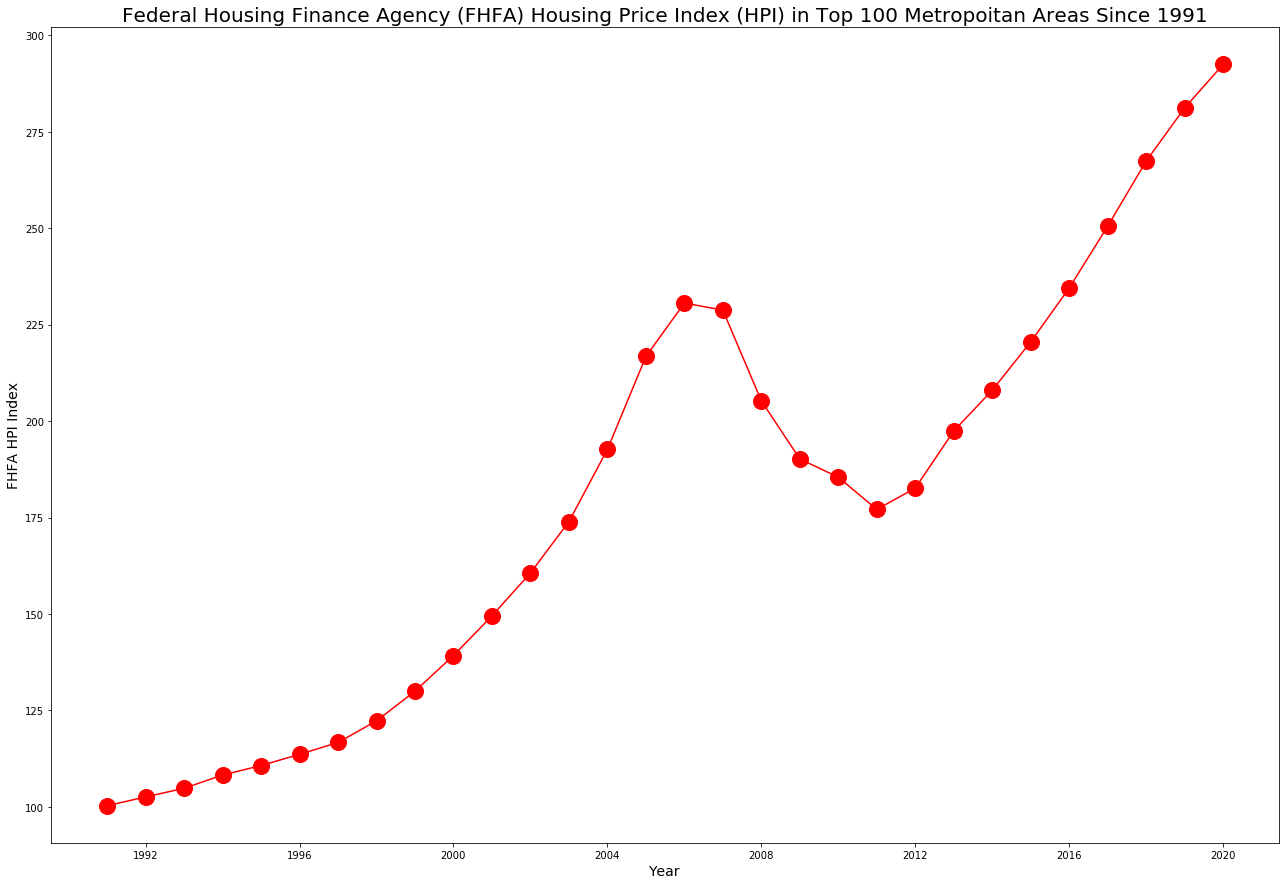

In [641]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

# silence warnings
import warnings
warnings.filterwarnings('ignore')

# initialize a useful helper function for later use
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

# initalize plot window size
width1 = 22
height1 = 15
dims = (width1, height1)

# read in HPI dataset
data = pd.read_csv("HPI_PO_metro.txt", sep='\t')
data = data.dropna()

# The data is quarterly - let's aggregate it into years
# which also collapses the different metro areas -
# giving a national average
g = data.groupby('yr').mean()

# get years because it became the index
i = g.index.values
years = [str(x) for x in i]
years = [dt.datetime.strptime(x,'%Y').date() for x in years]


# plot the data so we can see what it looks like
plt.figure(figsize=dims)
plt.plot(years, g['index_sa'], 'ro-', markersize=16)
plt.title('Federal Housing Finance Agency (FHFA) Housing Price Index (HPI) in Top 100 Metropoitan Areas Since 1991',fontsize=20)
plt.xlabel('Year',fontsize=14)
plt.ylabel('FHFA HPI Index',fontsize=14)
plt.show()


Just this quick peek at the high-level national average fits our intial expectations. We see a steady increase in house prices every year since 1991 up until 2007, when there is a slight decrease, followed by a steep decline in 2008, resulting in three more years of downward trending value before we finally see a recovery beginning in 2012. Since 2012, the real estate market has not only recovered the losses from before the 2008 crisis, but has actually surpassed the previous high set in 2006.

### A Closer Look
Now this is just a national average - useful to confirm our prior knowledge of what the maket did in the previous crisis, but not helpful in answering our questions about specifically where and when to buy or sell. The United States is a large country with many different real estate markets that may or may not be correlated. Intuitively we might suspect that different markets were affected differently by the financial crisis. Let's take a look at the top 100 metropolitan areas (by population) in the country and see what the HPI looks like in the top-5 cities that took the worst hit, and the bottom-5 cities that were least affected.

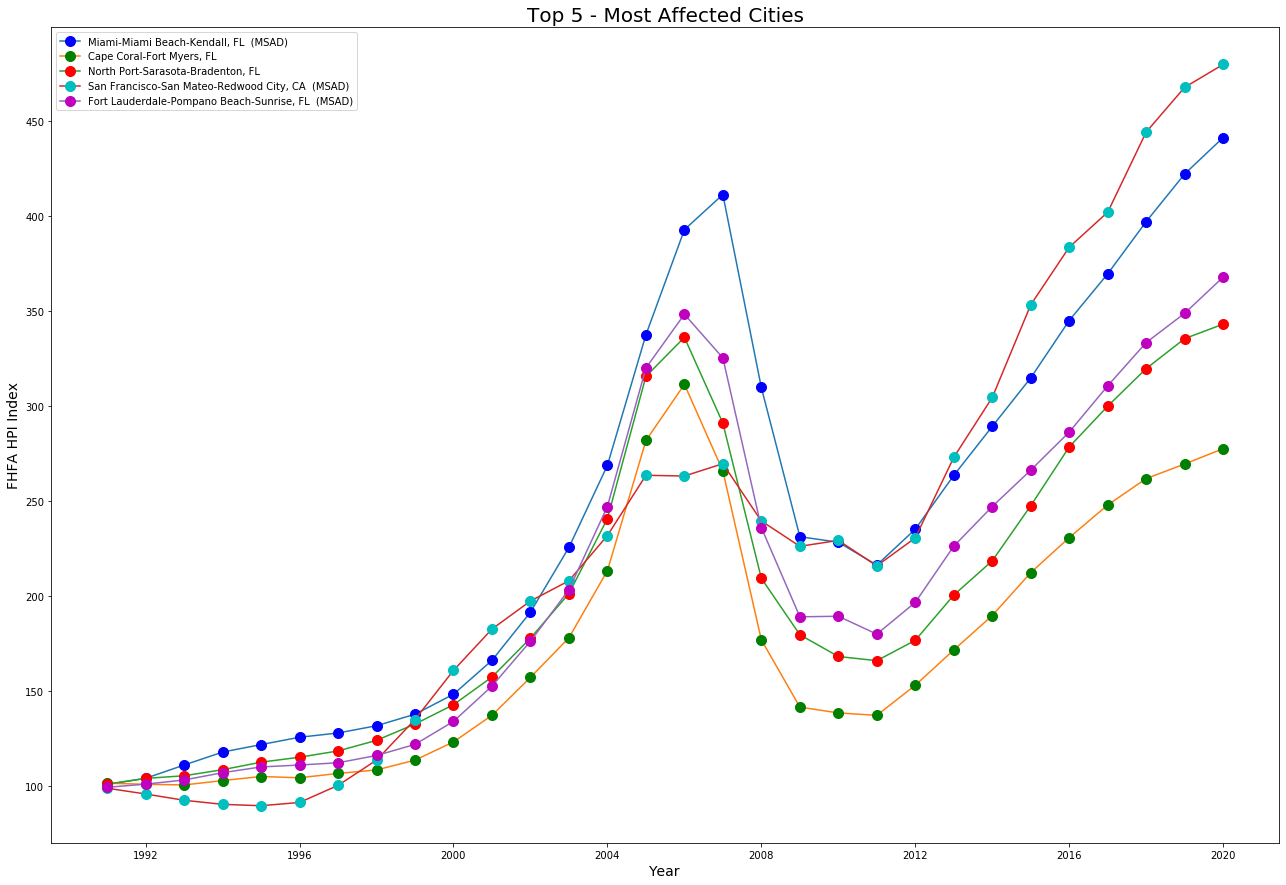

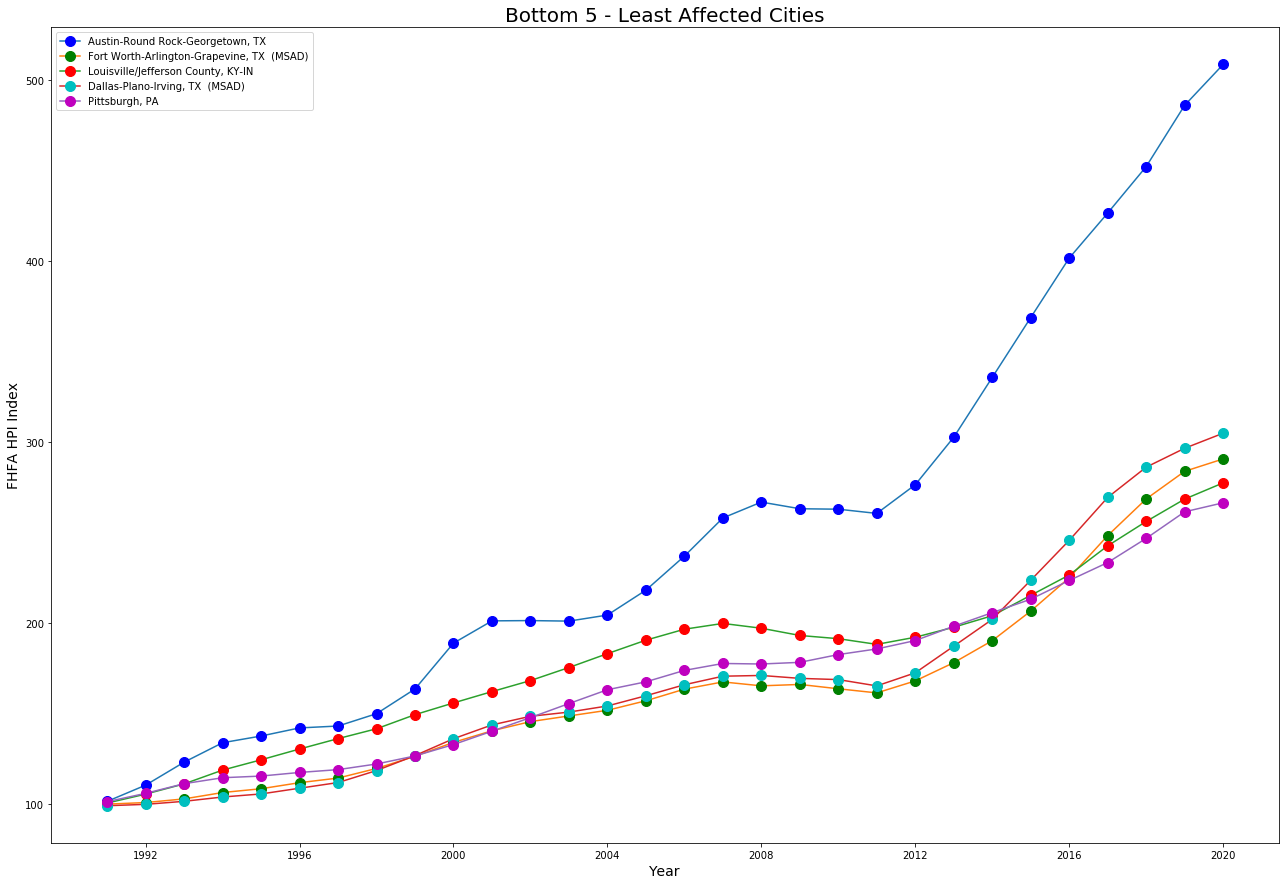

In [642]:
areas_arr = []
formats = ['b','g','r','c','m','y','k','azure','k','k']

#########
# function to apply to each city
# Iterate over all of the rows, and for each year, subtract the HPI from the next year's HPI
# if this number is negative, the HPI was higher in the previous year, meaning the market went down.
# We sum up these negative deltas, and order the cities by their total summed delta in the timeframe
#########
def test(data_in):
    city = data_in['metro_name'].unique()[0]
    count = 0
    r = len(data_in) - 1
    for i in range(r):
        delta = data_in.iloc[i+1]['index_sa'] - data_in.iloc[i]['index_sa']
        if delta < 0:
            count += delta 
    areas_arr.append((city,count))
    
# group by city and apply our ordering function    
by_city = data.groupby('metro_name').apply(test)
areas_arr.sort(key=lambda x:x[1])

bottom5 = areas_arr[-5:]
top5 = areas_arr[0:5:]

####
# plot top 5
####
plt.figure(figsize=dims)
i = 0
for point in top5:
    d = data.loc[data['metro_name'] == point[0]].groupby('yr').mean()
    plt.plot(years, d['index_sa'],markersize=10,markeredgecolor=formats[i],markerfacecolor=formats[i], marker='o', linestyle='-')
    i += 1

# plot
plt.title('Top 5 - Most Affected Cities',fontsize=20)
plt.xlabel('Year',fontsize=14)
plt.ylabel('FHFA HPI Index',fontsize=14)
ax = plt.gca()
ax.legend([x[0] for x in top5])
plt.show()

####
# plot bottom 5
####
plt.figure(figsize=dims)
i = 0
for point in bottom5:
    d = data.loc[data['metro_name'] == point[0]].groupby('yr').mean()
    plt.plot(years, d['index_sa'],markersize=10,markeredgecolor=formats[i],markerfacecolor=formats[i], marker='o', linestyle='-')
    i += 1

# plot
plt.title('Bottom 5 - Least Affected Cities',fontsize=20)
plt.xlabel('Year',fontsize=14)
plt.ylabel('FHFA HPI Index',fontsize=14)
ax = plt.gca()
ax.legend([x[0] for x in bottom5])
plt.show()

### What does this show us?

It is clear from looking at the above plots that there is a major difference between the cities whose real estate markets took the greatest hit during the 2008 financial crisis and those that were not affected nearly as much. In the context of looking for a promising market to make an investment in, or a city in which to purchase a home, we clearly want to find a way to determine whether a given metropolitan area is expected to see a significant decrease in real estate value. On the other hand, this is also relevent to investors with existing holdings - depending on the horizon you intended to hold the investment for, you would certainly want to know if your portfolio in a given city is at risk of sharply declining in value, at which point, you may not be able to get out without taking a loss for a decade or more. 

### Where should I look?
Depending on your investment strategy, you could be interested in either end of the spectrum we discovered above. A long term investor, looking to build a portfolio to hold onto for years or decades would be interested in the cities which are *least* affected by financial crises. A safe portfolio would aim to minimize variance/volatility/risk first, while still trying to maximize expected return. On the other hand - a shorter term investor may be looking to capitalize on the increased variance, get in at a bargain, and take advantage of the steep increase in value once the market recovers. It may be useful for us to attempt to find features which will allow us to categorize these metropolitan areas into ones that are likely to experience a large "dip" and those that are likely to remain more linear. A natural starting place would be unemployment rate. Intuitively - as unemployment goes up, more and more people are no longer going to be in a position to make their mortgage payments. These mortgages become delinquent, and eventually can go into default. As mortgages fail en masse - supply for real estate goes up, while demand goes down, dragging the value of real estate along with it. 

### Gathering Unemployment Data
Let's explore this intuition a bit further. The U.S. Bureau of Labor Statistics (BLS) is an excellent source for data on employment (an unemployment). I was able to download a .csv file containing unemployment numbers for "large metropolitan areas" going back to 1990. A perfect fit for the HPI data we already have. Here we can see, at a macro-level, how the unemployment rate plots against the aggregate HPI over time.

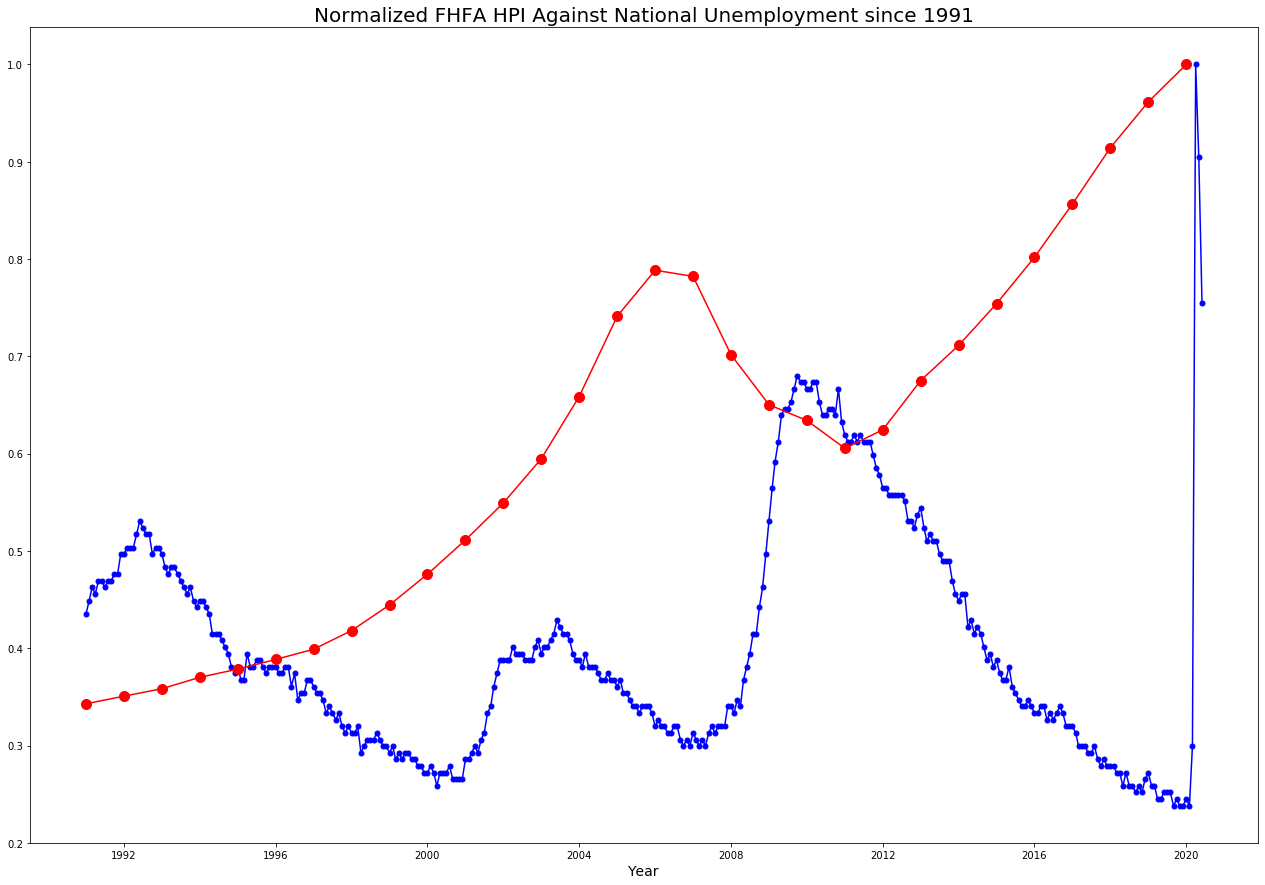

In [643]:
# get the unemployment data
unemployment = pd.read_csv("us_unemployment.csv", sep=',')

#
# a little bit of wrangling to get the dates properly formatted for plotting
# the HMI data is quarterly, but unemployment data is monthly
# we create a custom date range, and plot over that so everything fits
#
col = unemployment.loc[: , "Jan":"Dec"]
unemployment['mean'] = col.mean(axis=1)
u_list = unemployment.loc[:,"Jan":"Dec"].values.tolist()
u_list = [x for y in u_list for x in y]
dates = pd.date_range('1991-01-01','2020-12-12', freq='MS').strftime("%Y-%b").tolist()

# format the dates for plotting
x = [dt.datetime.strptime(d,'%Y-%b').date() for d in dates]

# normalize the unemployment data and hmi index so we can compare shape
u_list_n = [x/max(u_list) for x in u_list]
hmi_n = [x/max(g['index_sa']) for x in g['index_sa']]

# plot
plt.figure(figsize=dims)
plt.plot(x,u_list_n, 'bo-', markersize=5)
plt.plot(years, hmi_n, 'ro-', markersize=10)
plt.plot
plt.title('Normalized FHFA HPI Against National Unemployment since 1991',fontsize=20)
plt.xlabel('Year',fontsize=14)
plt.show()


Unsurprisingly, we can see a decent correlation between unemployment and HPI. In the early 90's, unemployment is rather high, but begins declining, as the HPI is going up. We see a "blip" in unemployment in the early 2000's, that has no effect on the HPI (maybe hinting that there is a threshold unemployment must cross before effects leak into real estate?). Then we see in 2008, unemployment increases sharply, alongside the HMI sharply decreasing. Looking closely, we see unemployment trending back down for about a year and a half before HPI begins recovering. Then from 2012 forward, HPI climbs to a 20 year high, and unemployment falls to a 20 year low (up until a few months ago where it skyrocketed far beyond the 2008 high, and dropped, almost as quickly, though it still remains above 2008-era levels). 

This plot is promising enough to warrant further exploration. Let's dig further into the relationship between the unemployment rate and HPI - looking into specific metropolitan areas to see if we can find some correlation between the two. Before we are able to actually look at this, there is further data manipulation we must perform. Unfortunately, the metropolitan areas explored by the two datasets do not exactly match up. We can get pretty close by utilizing diiflib.get_close_matches to find the closest string match between the two lists of areas, after which a visual inspection confirms the matches include at least one overlapping city. For the areas that return no match, I built a dictionary manually by searching through the lists for a geographically close match. These two methods combine to get us as close to a perfect match as possible, but some metro areas are indeed left without a match, but only a very small number. 

In [652]:
from difflib import get_close_matches

# trim any NaNs
ma_ue = pd.read_csv("ma_unemployment.csv", sep=',')
ma_ue = ma_ue.dropna()
ma_ue = ma_ue[ma_ue['Year'] != 1990.0]


# hand crafted dictionary to replace metro area names
rep = {'Los Angeles-Long Beach-Anaheim':'Anaheim-Santa Ana-Irvine','Boston-Cambridge-Nashua':'Boston,MA',
       'Philadelphia-Camden-Wilmington':'Camden,NJ  (MSAD)','Chicago-Naperville-Elgin':'Elgin,IL  (MSAD)',
       'Miami-Fort Lauderdale-West Palm Beach':'Miami-Miami Beach-Kendall,FL  (MSAD)',
       'New York-Newark-Jersey City':'Newark,NJ-PA  (MSAD)',
       'San Francisco-Oakland-Hayward':'Oakland-Berkeley-Livermore,CA  (MSAD)',
       'Miami-Fort Lauderdale-West Palm Beach':'West Palm Beach-Boca Raton-Boynton Beach,FL  (MSAD)',
      'Miami-Fort Lauderdale-West Palm Beach':'Miami-Miami Beach-Kendall, FL  (MSAD)',
       'San Francisco-Oakland-Hayward':'San Francisco-San Mateo-Redwood City, CA  (MSAD)',
      'Dallas-Fort Worth-Arlington':'Dallas-Plano-Irving, TX  (MSAD)'}
u_a = ma_ue['Area'].unique()
h_a = data['metro_name'].unique()
count = 0
u_a.sort()

for area in h_a:
    m = get_close_matches(area,u_a,n=1,cutoff=.4)
    #print(area + ': ' + str(m))
    if m != [] and m[0] not in rep:
        rep[m[0]] = area

ma_ue = ma_ue.replace(rep)

Now that we have standardized the names of our metropolitan areas, we directly compare, and know what it is we're looking at. Let's look at the unemployment rates over time for the same top-5 and bottom-5 we looked at above (here they become top-4 and bottom-4 as a result of the standardization - the HPI data split areas into two that the unemployment data kept as one in both the top-5 and bottom-5, so here, we only look at one of the two areas). We plot the national average for unemployment (bold, black line) for comparison.

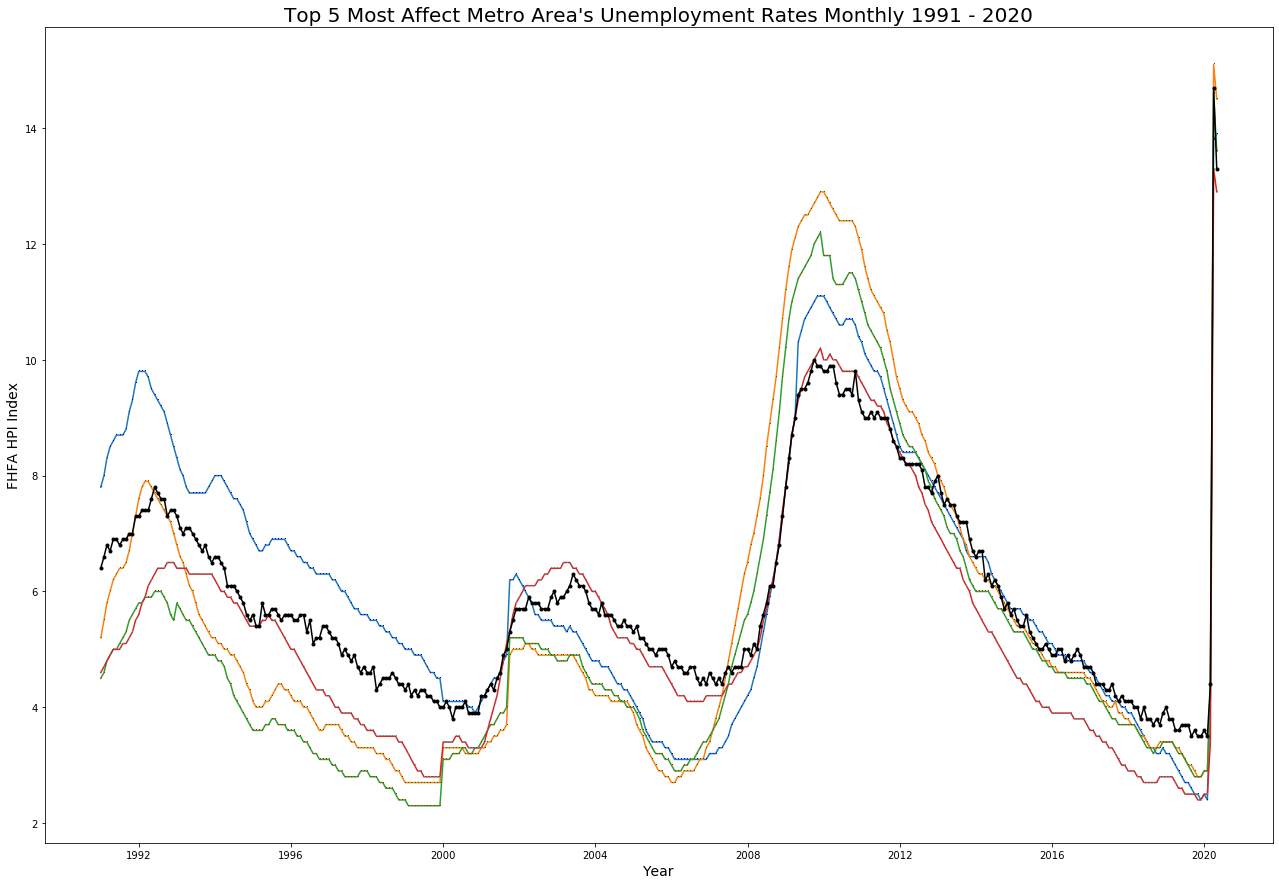

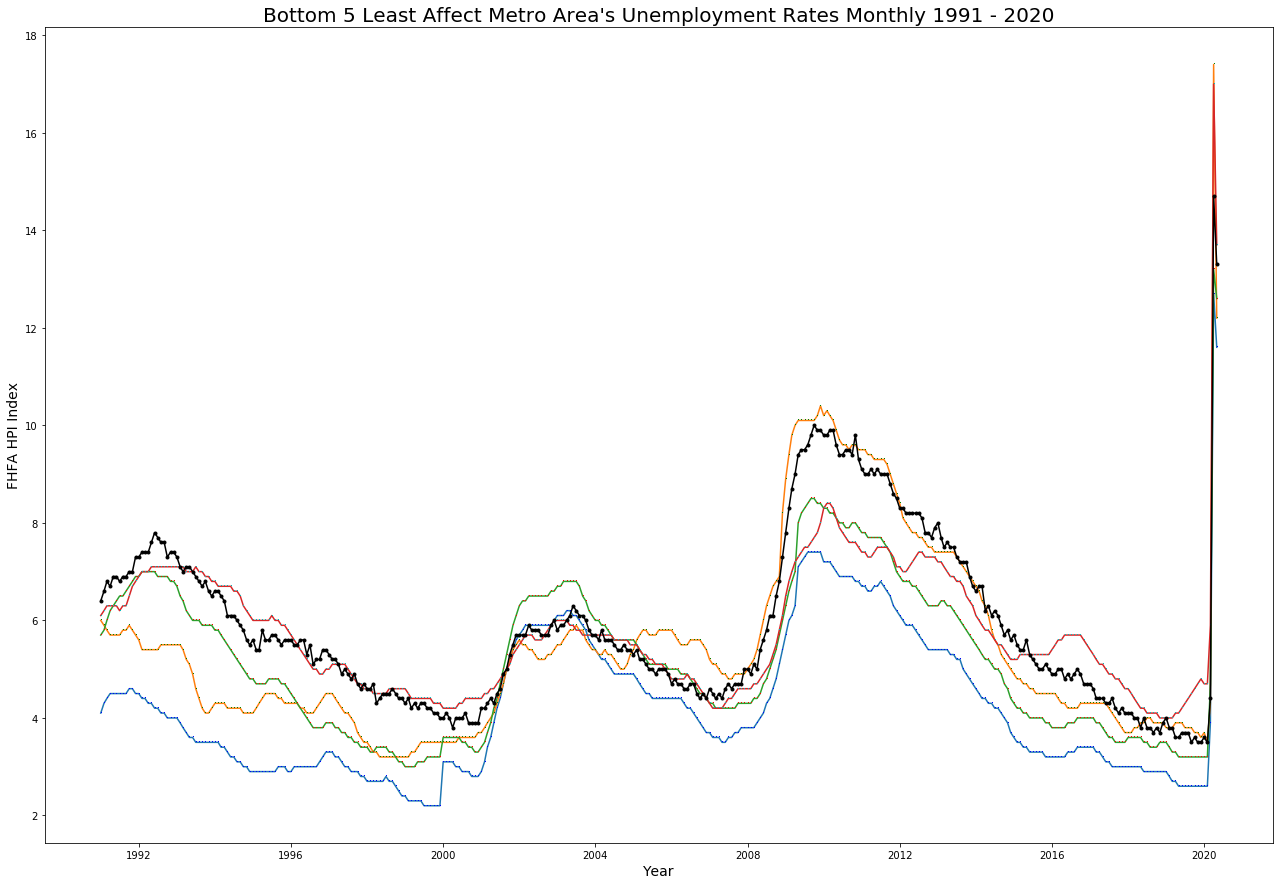

In [653]:
# set date range - there are a few extra records in the unemployment data, so we trim those off the end
dates = pd.date_range('1991-01-01','2020-05-01', freq='MS').strftime("%Y-%b").tolist()
trimmed_u_list = u_list[:-7]
trimmed_u_list = [float(x) for x in trimmed_u_list]

# format the dates for plotting
x = [dt.datetime.strptime(d,'%Y-%b').date() for d in dates]

####
# plot top 4
####
i = 0
plt.figure(figsize=dims)
for city, y in top5:
    this_area = ma_ue.loc[ma_ue['Area'] == city]
    if len(this_area) > 0:
        plt.plot(x, this_area['Unemployment Rate'],markersize=5,markeredgecolor=formats[i],markerfacecolor=formats[i], marker=',', linestyle='-')
        i += 1

# plot 
plt.plot(x,trimmed_u_list, 'ko-', markersize=3)
plt.title('Top 5 Most Affect Metro Area\'s Unemployment Rates Monthly 1991 - 2020',fontsize=20)
plt.xlabel('Year',fontsize=14)
plt.ylabel('FHFA HPI Index',fontsize=14)
plt.show()
    
####
# plot bottom 4
####
i = 0
plt.figure(figsize=dims)
for city, y in bottom5:
    this_area = ma_ue.loc[ma_ue['Area'] == city]
    if len(this_area) > 0:
        plt.plot(x, this_area['Unemployment Rate'],markersize=5,markeredgecolor=formats[i],markerfacecolor=formats[i], marker=',', linestyle='-')
        i += 1
# plot
plt.plot(x,trimmed_u_list, 'ko-', markersize=3)
plt.title('Bottom 5 Least Affect Metro Area\'s Unemployment Rates Monthly 1991 - 2020',fontsize=20)
plt.xlabel('Year',fontsize=14)
plt.ylabel('FHFA HPI Index',fontsize=14)
plt.show()

### Suspicions Confirmed
We again find what we should have expected is confirmed in the data. In the markets that were hit the hardest by the financial crisis, unemployment was above the national average in those years. In the markets that were least affected in 2008, unemployment was below the national average in each case but one. Worth noting is that in the hard hit areas, unemployment is not above the national average. It's only around 2008 where unemployment jumps up, which implies that the financial crisis hit those areas harder than most of the rest of the country - with respect to job loss.

### Following the Thread...
Now that we have some evidence of a relationship between these two features, we want to dig deeper. Looking at these plots, we see that the harder hit markets had unemployment rates that were a bit more "jumpy" than those rates in markets which were more resilient. Let's zoom in a bit closer on the relevent timeframe, ~2005-2012, and see if we can get a clearer picture of what's going on.

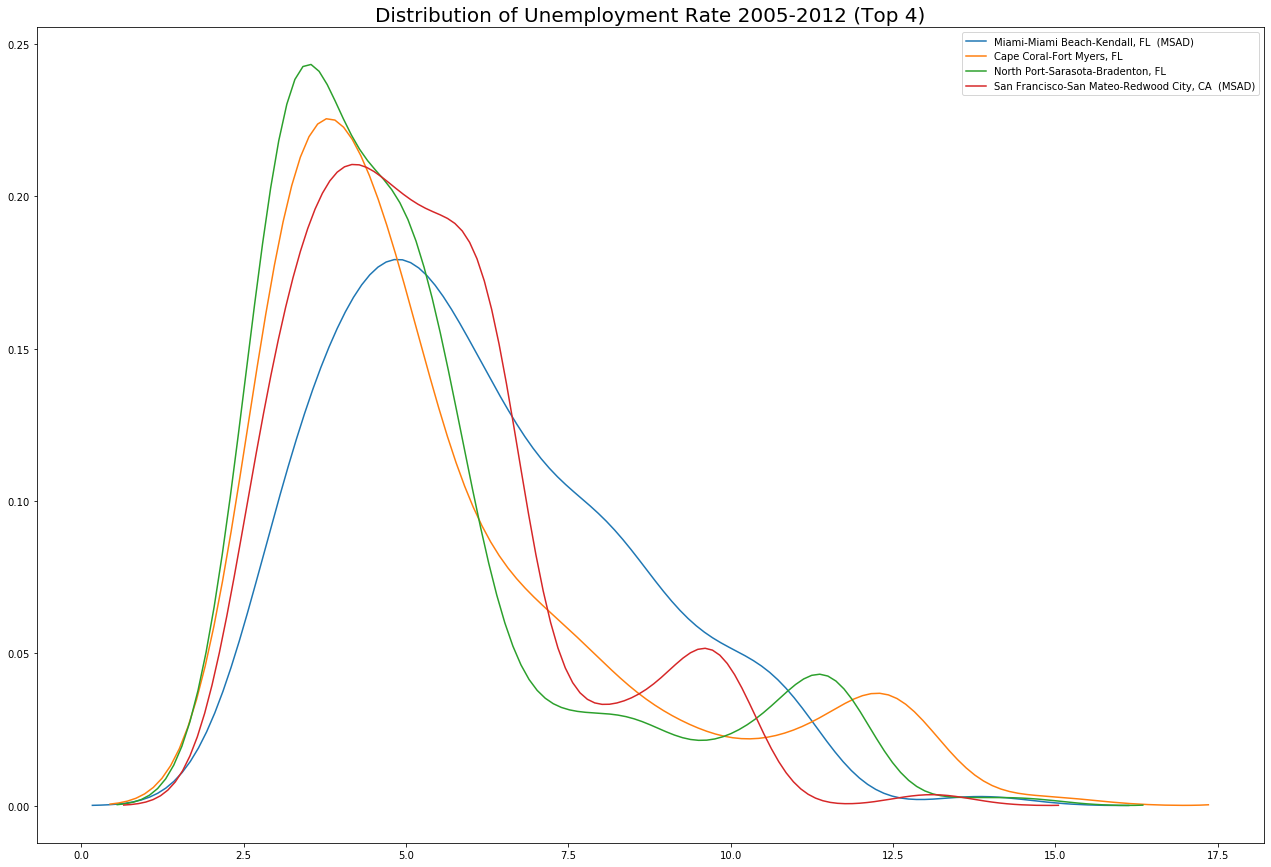

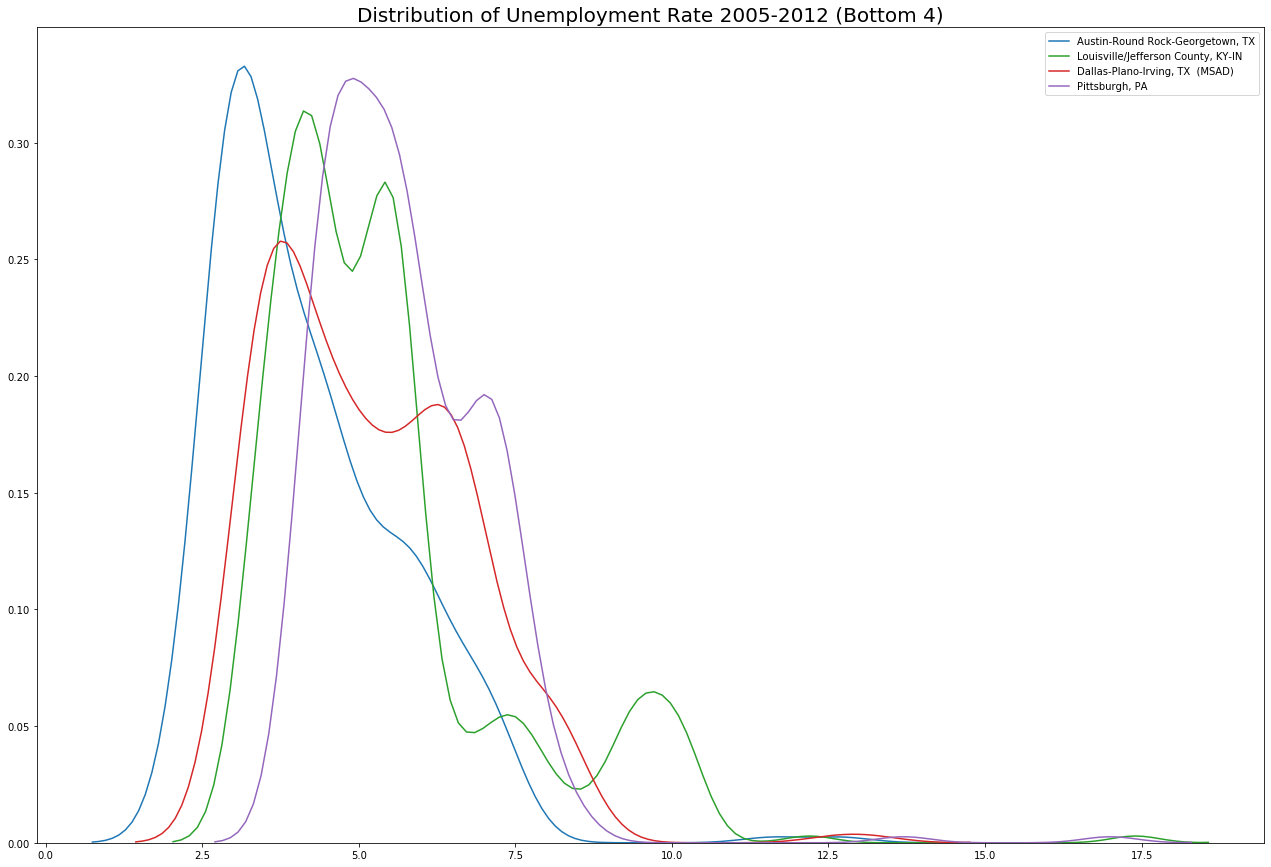

In [654]:
import seaborn as sns
from scipy import stats
from IPython.display import display, HTML

years = [x for x in range(2006,2012)]
top_variance = []
bottom_variance = []
plt.figure(figsize=dims)
plt.title('Distribution of Unemployment Rate 2005-2012 (Top 4)',fontsize=20)
for area,z in top5:
    y = []
    for x in ma_ue.loc[ma_ue['Area'] == area]['Unemployment Rate']:
        try:
            y.append(float(x))
        except:
            pass
    if len(y) > 2:
        top_variance.append((area,variance(y)))
    sns.distplot(y, hist=False, label=area);
plt.legend()


plt.figure(figsize=dims)
plt.title('Distribution of Unemployment Rate 2005-2012 (Bottom 4)',fontsize=20)
for area,z in bottom5:
    y = []
    for x in ma_ue.loc[ma_ue['Area'] == area]['Unemployment Rate']:
        try:
            y.append(float(x))
        except:
            pass
    if len(y) > 2:
        bottom_variance.append((area,variance(y)))
    sns.distplot(y, hist=False, label=area);
plt.legend()

### Observing the Relationship between Unemployment Rate and HPI
This is somewhat promising, but a little unclear. The two plots show similar distributions of unemployment rate, but the distributions for the top-4 are a bit wider, and skew a bit more to the right. Maybe this is something worth looking further into. Perhaps we can quantify this difference between the two by looking at the variance of unemployment rates, and see if that is indicative of how the HPI is likely to behave. I want to dive in and try to observe this directly by plotting the variance of the unemployment rates against some measure of how much the HPI declined in the respective metropolitan area. To obtain this measure, I'll employ a modified version of Kadane's Algorithm for finding the maximum (in this case minimum) contiguous subset of an array. First, we transform the HPI list for the area into a list of deltas, the change from one observation to the next (positive if it went up, negative if it went down). Then we utilize this algorithm to find, within the list of deltas, the contiguous subset which sums to the minimum value. This will give us a timeframe and magnitude for the largest drop in HPI. We then plot this value against the associated variance in unemployment rate, and see if we observe a correlation. We'll fit a line to the scatter plot and create a boxplot of the residuals to ensure the fit is sufficient.

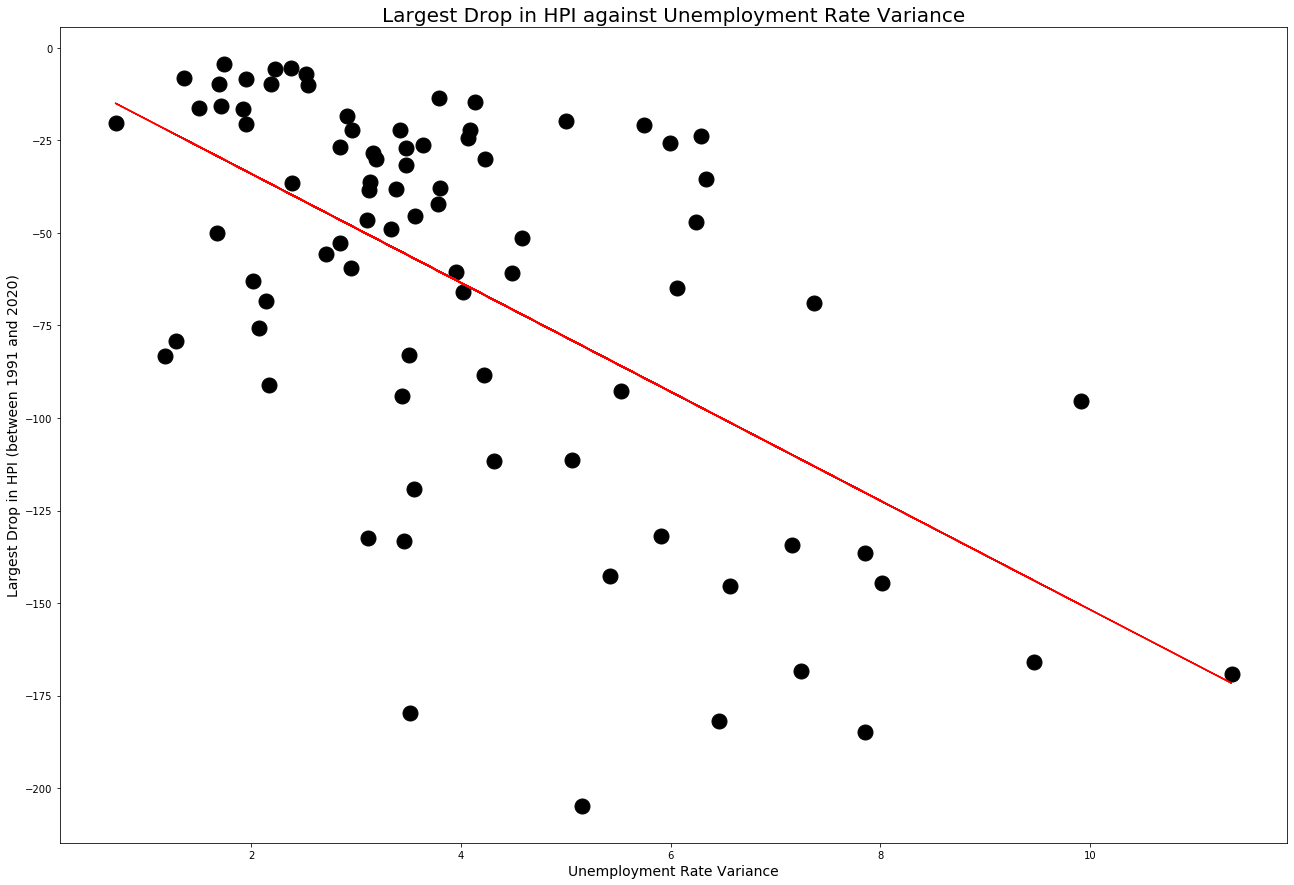

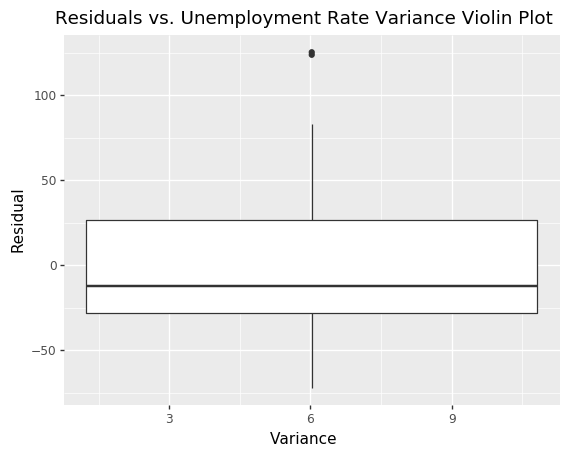

<ggplot: (133763836856)>

In [655]:
from math import sqrt
from plotnine import *
mins = []

#########
# Kadane's Algorithm (Modified)
# Get the sum and indicies of the smallest contiguous subset
# returns:
# - city
# - min continuous sum
# - variance
# - length of min contiguous sum (quarters)
#########
def test(data_in):
    city = data_in['metro_name'].unique()[0]
    min_so_far = 999999999
    min_ending_here = 999999999
    last_index = 0
    start_index = 0
    end_index = 0
    a = data_in['index_sa']
    delta = []
    for i in range(len(a) - 1):
        delta.append(a[i+1] - a[i])
    for i in range(len(delta)): 
        if (min_ending_here > 0): 
            min_ending_here = delta[i] 
            last_index = i
        else: 
            min_ending_here += delta[i] 
        if min_so_far > min_ending_here:
            min_so_far = min_ending_here;
            start_index = last_index;
            end_index = i;

        min_so_far = min(min_so_far, min_ending_here)
        
    # get the unemployment rate variance
    y = []
    v = 0
    for x in ma_ue.loc[ma_ue['Area'] == city]['Unemployment Rate']:
        try:
            y.append(float(x))
        except:
            pass
    if len(y) > 2:
        v = variance(y)
        mins.append((city,min_so_far,v,end_index - start_index + 1))

    
# group by city and apply our ordering function    
by_city = data.groupby('metro_name').apply(test)

mins.sort(key=lambda x:x[1])

# min contiguous sum
plot_y3 = [x[1] for x in mins]

# Unemployment Rate Variance
plot_x3 = [x[2] for x in mins]

# Length of min contiguous sum
plot_x4 = [x[3] for x in mins]

#####
# variance against largest drop in hpi
#####
p, res, rank, sv, ct = np.polyfit(plot_x3, plot_y3, 1, full=True)
m,b = p

plt.figure(figsize=dims)
plt.plot(plot_x3,plot_y3, 'ko', plot_x3, m*pd.DataFrame(plot_x3)+b, '-r', markersize=15)
plt.title('Largest Drop in HPI against Unemployment Rate Variance',fontsize=20)
plt.xlabel('Unemployment Rate Variance',fontsize=14)
plt.ylabel('Largest Drop in HPI (between 1991 and 2020)',fontsize=14)
plt.show()

# plot the residuals for contiguous drop in hpi
residuals = ((np.polyval(np.polyfit(plot_x3, plot_y3, 2), plot_x3) - plot_y3))
res = pd.DataFrame()
res['Variance'] = plot_x3
res['Residuals'] = residuals

ggplot(mapping=aes(x='Variance', y='Residuals'), data=res) +\
geom_boxplot() +\
labs(title="Residuals vs. Unemployment Rate Variance Violin Plot",
         x = "Variance",
         y = "Residual")


### Results
As you can see in the plot, it isn't the tightest fit, but there is a clear trend to be seen. The larger the maximum drop in HPI, the greater the variance of the unemployment rate in that area! Our boxplot of the residuals for the fit show there are a few outliers, indicating there are certainly other factors that are affecting the market as well, but overall, the fit isn't bad, and may be useful for constructing a model. 

### Classification
So far, we've identified a decent correlation between unemployment rate (variance) and HPI - which is a good start, but how do we utilize this information to predict where we want to place our investment? We noted before that different investment strategies will certainly view different HPI trajectories differently, so we want a way to account for this fact in our model. The most fitting approach, I believe, would be to classify areas based on the variance of it's unemployment rate. Ideally, we would be able to identify various classes that are fit for different types of investment, and when we're performing due diligence on an opportunity, we could employ this model to see which form of investment best fits its profile. But how many classes do we need? How many make sense, or can even be identified within the data? What we require is a classification model which could ideally, tell *us* how many clusters the data suggests. Luckily, such an algorithm exists - called Affinity Propagation. It is similar to K-Means and K-Nearest Neighbors in that aims to find "exemplars" in the input that are representative of the clusters they center. Here we apply Affinity Propagation to our data, and see what it is able to find.

Estimated number of clusters: 9


<Figure size 432x288 with 0 Axes>

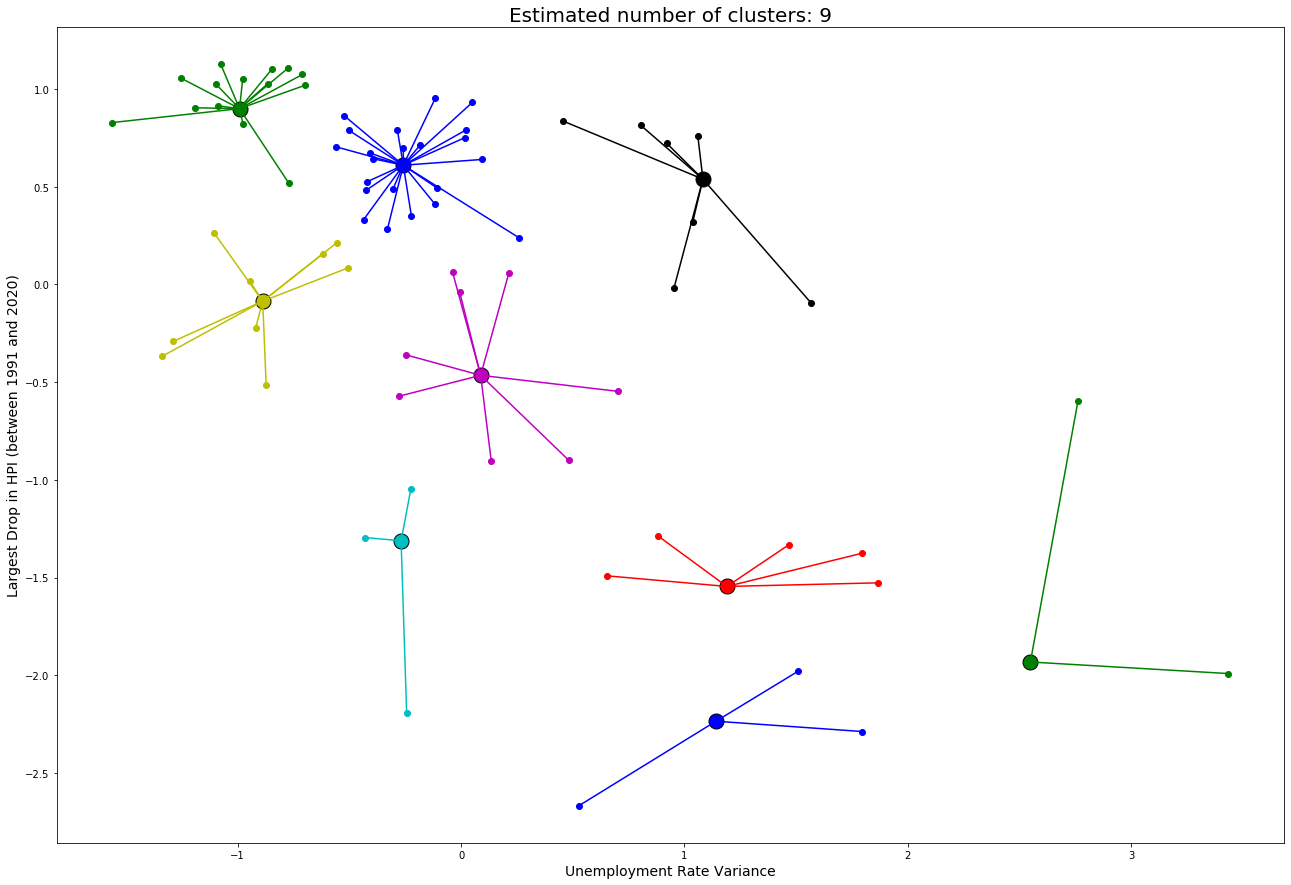

In [656]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from itertools import cycle
from statistics import mean, stdev

X = []
x3_norm = [(x-mean(plot_x3))/stdev(plot_x3) for x in plot_x3]
y3_norm = [(x-mean(plot_y3))/stdev(plot_y3) for x in plot_y3]
labels = [x[0] for x in mins]
            
for i in range(len(x3_norm)):
    X.append([x3_norm[i],y3_norm[i]])
    
X = np.asarray(X)
af = AffinityPropagation(random_state=0).fit(X)

cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)

plt.clf()

plt.figure(figsize=dims)
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.', markersize=12)
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=15)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_,fontsize=20)
plt.xlabel('Unemployment Rate Variance',fontsize=14)
plt.ylabel('Largest Drop in HPI (between 1991 and 2020)',fontsize=14)
ax = plt.gca()
plt.show()


### Interpretation
At first it doesn't look like it, but this is the same plot (except normalized) as the above scatter plot. The clustering algorithm we employed actually found 9 separate clusters. Though, it's natural to ask, how accurate are these clusters? What properties do constituents of one cluster have that clearly differentiate them from their neighbors? Perhaps the best next step would be to plot the HPI over time for each of these clusters and see how these classes behave.

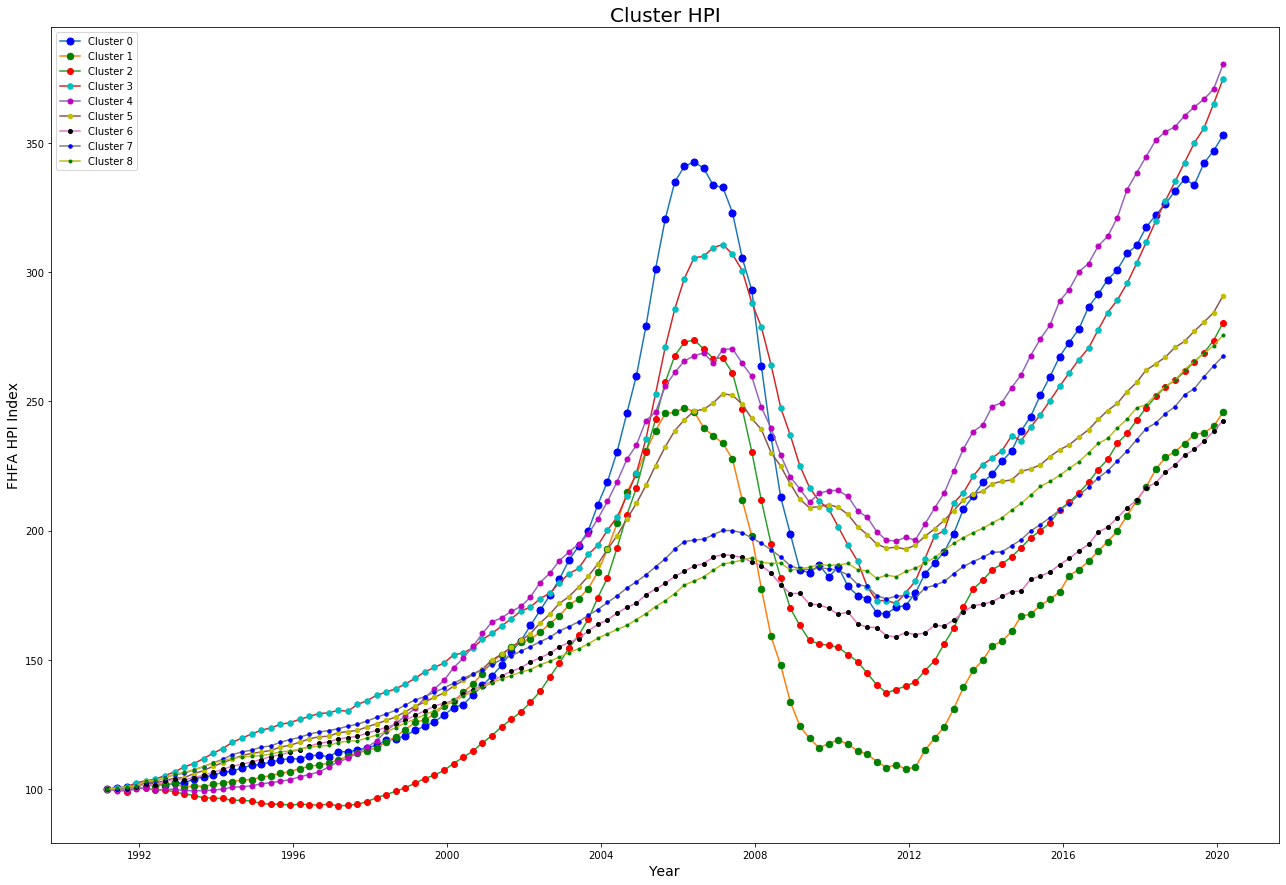

In [657]:
formats = ['b','g','r','c','m','y','k','darkorange','purple']

dates = pd.date_range('1991-01-01','2020-05-01', freq='Q').strftime("%Y-%b").tolist()

# format the dates for plotting
x = [dt.datetime.strptime(d,'%Y-%b').date() for d in dates]

clusters = []
clusters.append(np.asarray(mins)[[x == 0 for x in labels]])
clusters.append(np.asarray(mins)[[x == 1 for x in labels]])
clusters.append(np.asarray(mins)[[x == 2 for x in labels]])
clusters.append(np.asarray(mins)[[x == 3 for x in labels]])
clusters.append(np.asarray(mins)[[x == 4 for x in labels]])
clusters.append(np.asarray(mins)[[x == 5 for x in labels]])
clusters.append(np.asarray(mins)[[x == 6 for x in labels]])
clusters.append(np.asarray(mins)[[x == 7 for x in labels]])
clusters.append(np.asarray(mins)[[x == 8 for x in labels]])

i = 0
plt.figure(figsize=dims)
colors = 'bgrcmykbgrcmykbgrcmykbgrcmyk'
for cluster in clusters:
    arr = []
    for row in cluster:
        if arr == []:
            arr = np.asarray(data.loc[data['metro_name'] == row[0]]['index_sa'])
        else:
            arr += np.asarray(data.loc[data['metro_name'] == row[0]]['index_sa'])
    cluster_y = arr/float(len(clusters[i]))
    plt.plot(x, cluster_y,markersize=7-(i*.5),markeredgecolor=colors[i],markerfacecolor=colors[i], marker='o', linestyle='-')
    i += 1


plt.title('Cluster HPI',fontsize=20)
plt.xlabel('Year',fontsize=14)
plt.ylabel('FHFA HPI Index',fontsize=14)
ax = plt.gca()
ax.legend(['Cluster 0','Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5','Cluster 6','Cluster 7','Cluster 8',])
plt.show()

This plot is a bit busy, but looking closely, we can see similarities *and* differences between the various classes. Different peaks, vallies, duration of "dips", even existence of significant dips differ from class to class. From observation, I'm able to identify four classes which, visually, appear more flat than they do "N" shaped (clusters 5-8) and the first 5 clusters appear much more turbulent in nature. Let's separate out these manually observerd clusters into two separate plots to make things a bit easier.

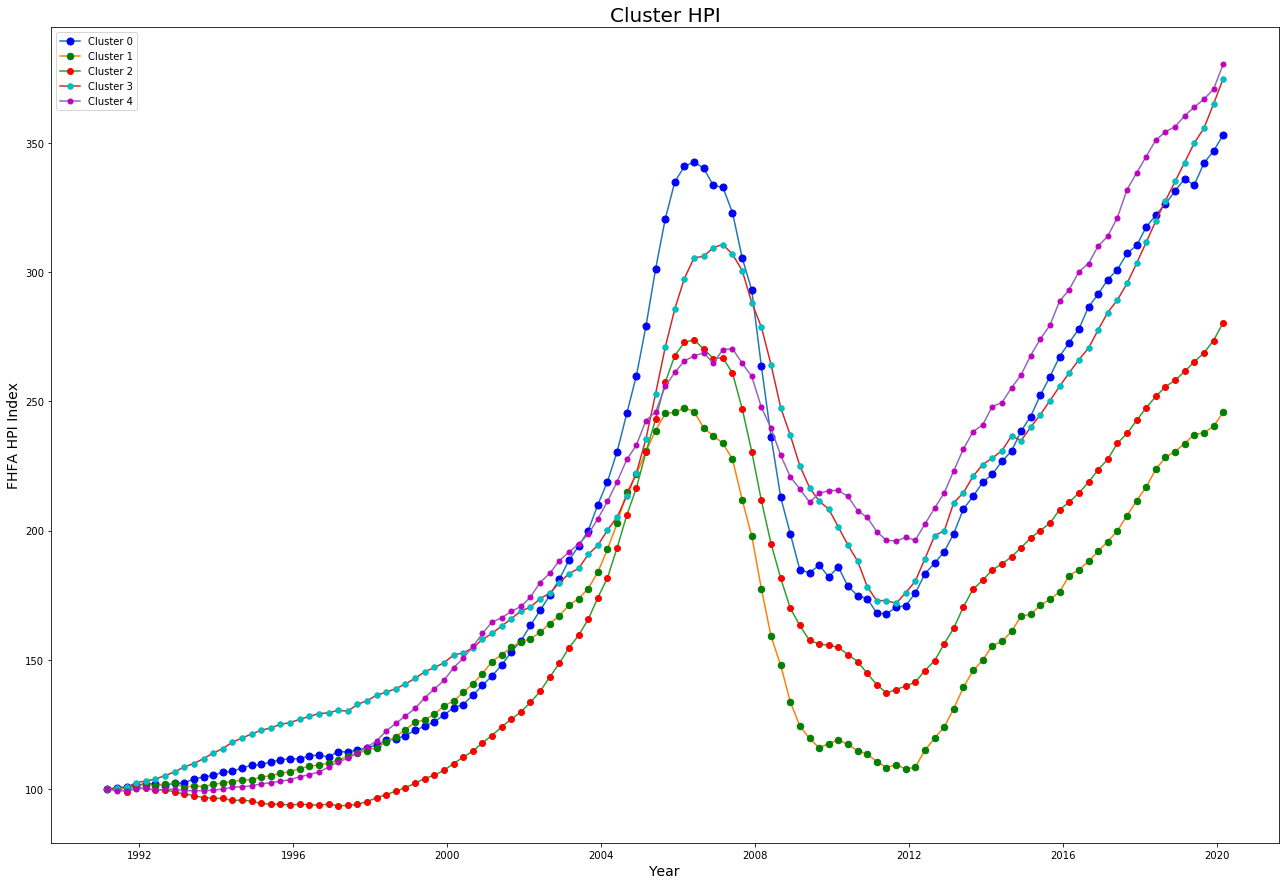

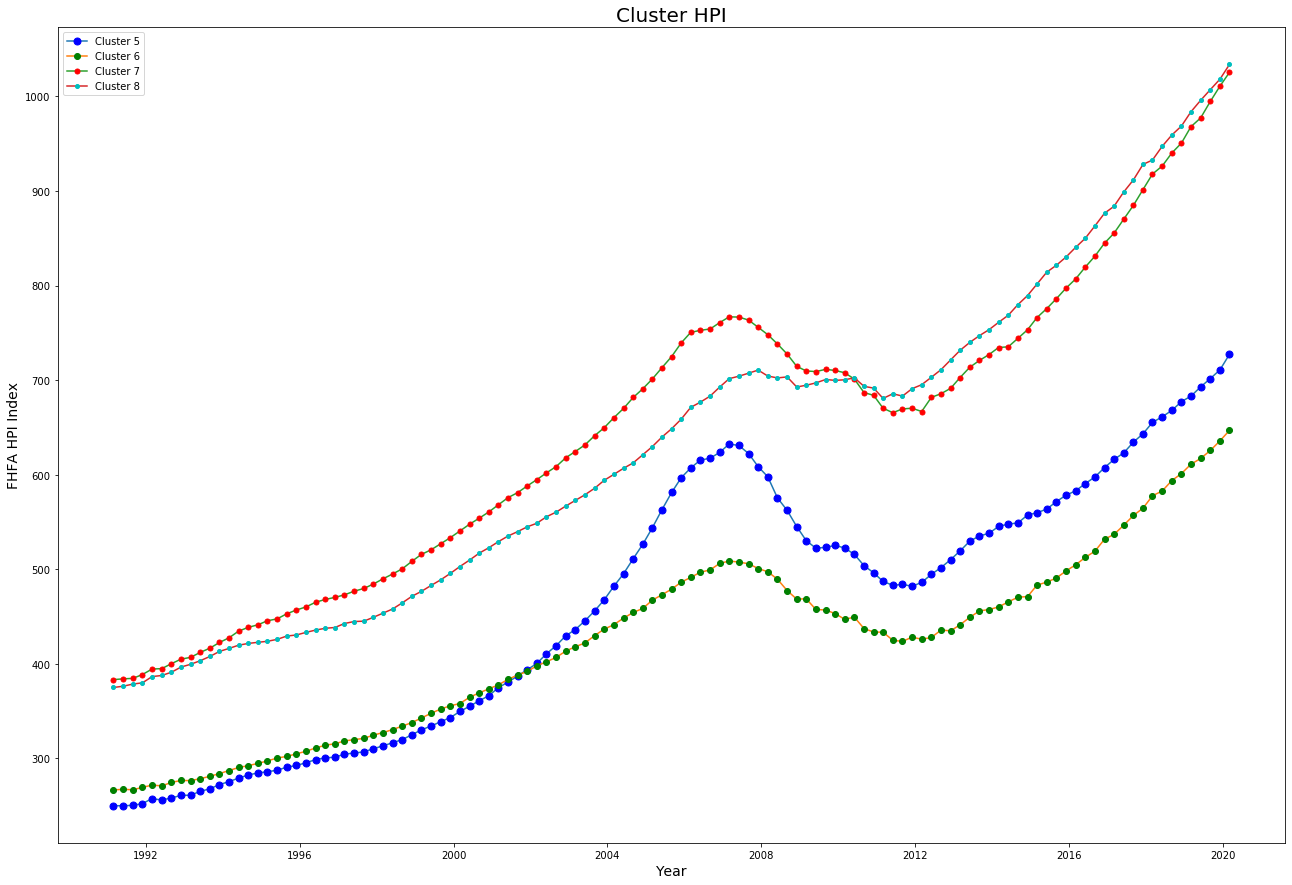

In [658]:
i = 0
plt.figure(figsize=dims)
for cluster in clusters[:5]:
    arr = []
    for row in cluster:
        if arr == []:
            arr = np.asarray(data.loc[data['metro_name'] == row[0]]['index_sa'])
        else:
            arr += np.asarray(data.loc[data['metro_name'] == row[0]]['index_sa'])
    cluster_y = arr/float(len(clusters[i]))
    plt.plot(x, cluster_y,markersize=7-(i*.5),markeredgecolor=formats[i],markerfacecolor=formats[i], marker='o', linestyle='-')
    i += 1


plt.title('Cluster HPI',fontsize=20)
plt.xlabel('Year',fontsize=14)
plt.ylabel('FHFA HPI Index',fontsize=14)
ax = plt.gca()
ax.legend(['Cluster 0','Cluster 1','Cluster 2','Cluster 3','Cluster 4'])
plt.show()

i = 0
plt.figure(figsize=dims)
for cluster in clusters[5:]:
    arr = []
    for row in cluster:
        if arr == []:
            arr = np.asarray(data.loc[data['metro_name'] == row[0]]['index_sa'])
        else:
            arr += np.asarray(data.loc[data['metro_name'] == row[0]]['index_sa'])
    cluster_y = arr/float(len(clusters[i]))
    plt.plot(x, cluster_y,markersize=7-i,markeredgecolor=formats[i],markerfacecolor=formats[i], marker='o', linestyle='-')
    i += 1


plt.title('Cluster HPI',fontsize=20)
plt.xlabel('Year',fontsize=14)
plt.ylabel('FHFA HPI Index',fontsize=14)
ax = plt.gca()
ax.legend(['Cluster 5','Cluster 6','Cluster 7','Cluster 8',])
plt.show()

This is much more clear. The first grouping are characterized by a clear and significant increase until the 2007-2008 timeframe, at which point the decline rapidly (though to differing degrees, and after reaching different peaks) and then they rebound around 2012. The second grouping, first of all, start from two separate starting points (~280 and ~380), and then increase modestly until 2007-2008, followed by a brief and calm decline, after which, they resume their upward trajectory around 2012. These plots give a pretty good sense of the "regions" of the space they cover, but we can get an even better understanding by looking at the specific constituents of each cluster and examining their properties.

In [659]:
i = 0
for cluster in clusters:
    df = pd.DataFrame(cluster,columns=['Metro Area', 'Biggest Loss in HPI', 'Unemployment Rate Variance', 'Duration of Max HPI Loss'])
    m = np.asarray(df['Biggest Loss in HPI']).astype(np.float).mean()
    m2 = np.asarray(df['Unemployment Rate Variance']).astype(np.float).mean()
    m3 = np.asarray(df['Duration of Max HPI Loss']).astype(np.float).mean()
    printmd('## Cluster ' + str(i))
    printmd('Mean Max HPI Loss: ' + str(round(m,2)))
    printmd('Mean Unemployment Rate Variance: ' + str(round(m2,2)))
    printmd('Mean Duration of Max HPI Loss: ' + str(round(m3,2)))
    display(df)
    i += 1
    print('\n')

## Cluster 0

Mean Max HPI Loss: -184.95

Mean Unemployment Rate Variance: 6.68

Mean Duration of Max HPI Loss: 18.75

,Metro Area,Biggest Loss in HPI,Unemployment Rate Variance,Duration of Max HPI Loss
0,"Miami-Miami Beach-Kendall, FL (MSAD)",-204.74,5.154842583054339,16
1,"Cape Coral-Fort Myers, FL",-184.69,7.857470383723925,19
2,"North Port-Sarasota-Bradenton, FL",-181.91,6.461905260108164,18
3,"West Palm Beach-Boca Raton-Boynton Beach, FL ...",-168.46000000000004,7.242113861704867,22


## Cluster 1

Mean Max HPI Loss: -143.41

Mean Unemployment Rate Variance: 10.24

Mean Duration of Max HPI Loss: 24.67

,Metro Area,Biggest Loss in HPI,Unemployment Rate Variance,Duration of Max HPI Loss
0,"Las Vegas-Henderson-Paradise, NV",-169.02999999999992,11.347392640999228,24
1,"Stockton, CA",-165.90999999999997,9.459670036054597,25
2,"Detroit-Dearborn-Livonia, MI (MSAD)",-95.3,9.914201648210147,25


## Cluster 2

Mean Max HPI Loss: -139.2

Mean Unemployment Rate Variance: 6.82

Mean Duration of Max HPI Loss: 20.0

,Metro Area,Biggest Loss in HPI,Unemployment Rate Variance,Duration of Max HPI Loss
0,"Orlando-Kissimmee-Sanford, FL",-145.5,6.565801088076229,17
1,"Riverside-San Bernardino-Ontario, CA",-144.52000000000004,8.010592647437548,21
2,"Tampa-St. Petersburg-Clearwater, FL",-142.63000000000002,5.423598860417203,19
3,"Fresno, CA",-136.51999999999998,7.856310198300283,21
4,"Bakersfield, CA",-134.23000000000002,7.15721526525882,19
5,"Sacramento-Roseville-Folsom, CA",-131.76999999999998,5.905174156579964,23


## Cluster 3

Mean Max HPI Loss: -141.08

Mean Unemployment Rate Variance: 3.41

Mean Duration of Max HPI Loss: 19.5

,Metro Area,Biggest Loss in HPI,Unemployment Rate Variance,Duration of Max HPI Loss
0,"Phoenix-Mesa-Chandler, AZ",-179.61,3.512751738346639,21
1,"Boise City, ID",-133.16,3.459946722894669,16
2,"Tucson, AZ",-132.29,3.1191216520731393,18
3,"Jacksonville, FL",-119.25999999999996,3.5522501757981235,23


## Cluster 4

Mean Max HPI Loss: -85.41

Mean Unemployment Rate Variance: 4.28

Mean Duration of Max HPI Loss: 19.22

,Metro Area,Biggest Loss in HPI,Unemployment Rate Variance,Duration of Max HPI Loss
0,"Oxnard-Thousand Oaks-Ventura, CA",-111.74000000000004,4.320143896471801,22
1,"San Diego-Chula Vista-Carlsbad, CA",-111.39000000000001,5.057497102755601,25
2,"Seattle-Bellevue-Kent, WA (MSAD)",-94.11000000000001,3.439223216585115,18
3,"San Jose-Sunnyvale-Santa Clara, CA",-92.78999999999996,5.528778328611898,11
4,"Portland-Vancouver-Hillsboro, OR-WA",-88.45999999999998,4.218643767705382,19
5,"Charleston-North Charleston, SC",-82.93,3.505857745300026,15
6,"San Francisco-San Mateo-Redwood City, CA (MSAD)",-65.85000000000002,4.0173232680916815,19
7,"Atlanta-Sandy Springs-Alpharetta, GA",-60.81,4.487155710790626,19
8,"Worcester, MA-CT",-60.57000000000002,3.9503352755601338,25


## Cluster 5

Mean Max HPI Loss: -67.87

Mean Unemployment Rate Variance: 2.11

Mean Duration of Max HPI Loss: 18.2

,Metro Area,Biggest Loss in HPI,Unemployment Rate Variance,Duration of Max HPI Loss
0,"Salt Lake City, UT",-91.15999999999997,2.173639743754829,17
1,"Warren-Troy-Farmington Hills, MI (MSAD)",-83.33,1.1813868143188255,24
2,"Washington-Arlington-Alexandria, DC-VA-MD-WV ...",-79.30000000000001,1.2863543007983518,12
3,"Minneapolis-St. Paul-Bloomington, MN-WI",-75.66,2.073043233324749,21
4,"Virginia Beach-Norfolk-Newport News, VA-NC",-68.44,2.1401929886685553,17
5,"Baltimore-Columbia-Towson, MD",-63.07000000000002,2.0178051764099925,18
6,"Bridgeport-Stamford-Norwalk, CT",-59.41999999999999,2.9553883917074426,22
7,"Richmond, VA",-55.599999999999994,2.715074362606232,17
8,"Allentown-Bethlehem-Easton, PA-NJ",-52.70000000000002,2.844561067473603,18
9,"Albuquerque, NM",-50.04999999999998,1.678306721607005,16


## Cluster 6

Mean Max HPI Loss: -38.34

Mean Unemployment Rate Variance: 6.13

Mean Duration of Max HPI Loss: 18.62

,Metro Area,Biggest Loss in HPI,Unemployment Rate Variance,Duration of Max HPI Loss
0,"Lake County-Kenosha County, IL-WI (MSAD)",-68.98000000000002,7.3711329835178985,19
1,"Providence-Warwick, RI-MA",-64.97999999999999,6.0608551699716715,26
2,"Grand Rapids-Kentwood, MI",-46.97,6.241071980427504,21
3,"Charlotte-Concord-Gastonia, NC-SC",-35.47,6.3377707313932525,12
4,"El Paso, TX",-25.76000000000002,5.991714846767963,16
5,"Greensboro-High Point, NC",-23.909999999999997,6.289323654390935,20
6,"Winston-Salem, NC",-20.92999999999998,5.745059393510172,22
7,"Greenville-Anderson, SC",-19.74000000000001,5.001961112541849,13


## Cluster 7

Mean Max HPI Loss: -31.41

Mean Unemployment Rate Variance: 3.53

Mean Duration of Max HPI Loss: 17.61

,Metro Area,Biggest Loss in HPI,Unemployment Rate Variance,Duration of Max HPI Loss
0,"Wilmington, DE-MD-NJ (MSAD)",-51.30000000000001,4.584498293844965,21
1,"New Haven-Milford, CT",-48.91,3.330297289466907,23
2,"Milwaukee-Waukesha, WI",-46.400000000000006,3.1025853077517382,19
3,"Colorado Springs, CO",-45.41999999999999,3.558215458408447,20
4,"New Orleans-Metairie, LA",-42.15999999999997,3.781450392737574,17
5,"St. Louis, MO-IL",-38.44999999999999,3.1274755343806335,19
6,"Cleveland-Elyria, OH",-38.120000000000005,3.3825500579448877,23
7,"Birmingham-Hoover, AL",-37.859999999999985,3.803265194437291,16
8,"Akron, OH",-36.19,3.1339626255472575,23
9,"Memphis, TN-MS-AR",-31.69999999999999,3.4809248647952615,17


## Cluster 8

Mean Max HPI Loss: -12.99

Mean Unemployment Rate Variance: 1.92

Mean Duration of Max HPI Loss: 11.6

,Metro Area,Biggest Loss in HPI,Unemployment Rate Variance,Duration of Max HPI Loss
0,"Kansas City, MO-KS",-36.629999999999995,2.3911460211176925,14
1,"Tulsa, OK",-20.669999999999987,1.9529229976822045,7
2,"Omaha-Council Bluffs, NE-IA",-20.169999999999987,0.7072284638166366,18
3,"San Antonio-New Braunfels, TX",-16.409999999999997,1.9195019958794748,13
4,"Baton Rouge, LA",-16.189999999999998,1.4992343226886429,16
5,"Albany-Schenectady-Troy, NY",-15.649999999999977,1.709684200360546,18
6,"Syracuse, NY",-10.120000000000005,2.542170357970641,20
7,"Little Rock-North Little Rock-Conway, AR",-9.889999999999986,1.6978101661086789,18
8,"Austin-Round Rock-Georgetown, TX",-9.689999999999998,2.187643252639712,10
9,"Houston-The Woodlands-Sugar Land, TX",-8.47999999999999,1.9493465104300798,3


It's quite fascinating to see the differences between the properties of each cluster. 

1. Cluster 0 - Extraordinarily high max HPI loss, high UE variance, moderately high duration of max HPI loss
1. Cluster 1 - Very high max HPI loss, Extraordinarly high UE variance, very high duration of max HPI loss
1. Cluster 2 - High max HPI loss, high UE variance, moderately high duration of max HPI loss
1. Cluster 3 - Moderately high high max HPI loss, moderate UE variance, moderately high duration of max HPI loss
1. Cluster 4 - Moderate max HPI loss, moderate UE variance, moderately high duration of max HPI loss
1. Cluster 5 - Average max HPI loss, low UE variance, moderately high duration of max HPI loss
1. Cluster 6 - Moderately low max HPI loss, high UE variance, moderately high duration of max HPI loss
1. Cluster 7 - Low max HPI loss, moderate UE variance, high duration of max HPI loss
1. Cluster 8 - Extraordinarily Low max HPI loss, low UE variance, Extraordinarily low duration of max HPI loss

Additionally, as a side effect of the classification, we get an interesting geographic classification, which may help as a rough heuristic in looking at a potential location for investment. For example, the entirely of cluster 0 are Florida locales, and cluster 2 is all Florida and California. Conversely, much of cluster 7 is in the Midwest, and cluster 8 sees a lot of Texas and New York.

## Conclusion
Here we have traced our way through the data science lifecycle, including curating, parsing and managing the FHFA HPI dataset, and the BLS Unemployment data, which we had to correlate and standardize. We performed exploratory data analysis to see what the data wanted to tell us - namely that the unemployment rate as does in fact have a correlation with the real estate market. We were able to visualize this through the utilization of several different plots, which drove further analysis to investigate the true nature of the relationship. We were able to employ machine learning to generate a classification of potential cluseters within the data, which we were able to see in various plots, and understand more deeply by looking at tables of the clusters' specific components. The only piece left is to interpret, what does this mean, and why is it important? To answer this, we look back onto our original goal - to find gather enough supporting data to build a model which will allow us to predict where and when to invest in real estate in the times preceeding a financial crisis; and that's exactly what we've done. We have constructed a classification model that allows us to make a forecast, given a specific metropolitan area, as to how its real estate market will behave, given its unemployment profile. 